In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#Info about the datatypes of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#Check for missing values
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Information about the mean,median,max
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
#Encoding-Converting into numerical values for regression
dataset["Gender"]=dataset["Gender"].replace("Male",1)
dataset["Gender"]=dataset["Gender"].replace("Female",0)

C:\Users\tanay\AppData\Local\Temp\ipykernel_27404\3616333521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["Gender"]=dataset["Gender"].replace("Female",0)


In [15]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: xlabel='Gender', ylabel='count'>

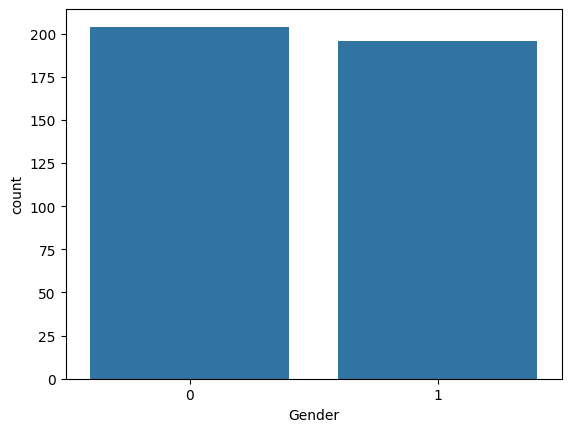

In [ ]:
#Visualization of the dataset
sns.countplot(data=dataset,x="Gender")

<Axes: ylabel='Age'>

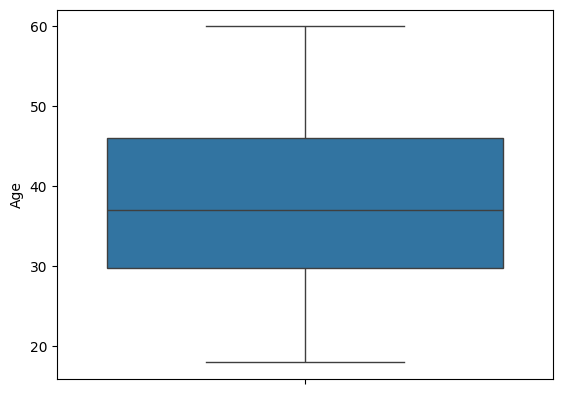

In [20]:
sns.boxplot(data=dataset["Age"])

In [25]:
#seperating the features and target variable
X=dataset.drop(["User ID"],axis=1)
X=dataset.drop(["Purchased"],axis=1)
Y=dataset["Purchased"]


In [27]:
#Model Building
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)


In [38]:
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.preprocessing import StandardScaler
model=LR()
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)
model.fit(X_train,Y_train)

LogisticRegression()

In [42]:
#Predicting the test set results whether it is purchased or not
y_pred=model.predict(X_test)


In [37]:
#Testing the accuracy of the model
print("Predicted:", y_pred[:5])
print("Actual:   ", Y_test[:5])

Predicted: [0 1 1 1 0]
Actual:    152    0
217    0
253    1
297    1
137    1
Name: Purchased, dtype: int64


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[68 13]
 [ 8 31]]


In [47]:
TN, FP, FN, TP = cm.ravel()
accuracy=(TP+TN)/(TP+TN+FN+FP)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1_score=(2*precision*recall)/(precision+recall)
print("F1 Score",f1_score)


Accuracy: 0.825
Precision: 0.7045454545454546
Recall: 0.7948717948717948
F1 Score 0.746987951807229
